In [1]:
import numpy as np
import sys
import emcee
import corner
import matplotlib as plt


In [2]:
import emcee_demo

# Define the model class

In [50]:
class get_model:

    def __init__(self, paramsdict_free, params_fixed,
                 paramsdict_fixed, **kwargs):
        self.paramsdict_fixed = paramsdict_fixed
        self.paramsdict_free = paramsdict_free
        self.params_fixed = params_fixed
        
        
    def get_kw(self, params):
        kw = {'a': 0.2,
              'b': 1,}
        
        for i, pf in enumerate(self.paramsdict_fixed):
            kw[pf] = self.params_fixed[i]

        for i, pf in enumerate(self.paramsdict_free):
            kw[pf] = params[i]
        ###
        self.kw = kw
    
    def model(self, x, params):
        self.get_kw(params)
        params = self.kw
        '''
        This is an example model 'y = a*x + b' where a and b are parameters.
        '''
        return params['a'] * x + params['b']

# Set some data (with random noise added)

In [75]:
data_x = np.linspace(0, 10, 20)
data_y_sample = np.zeros((50, 20))
for i in range(50):
    data_y_sample[i] = .2 * data_x + 1 + np.random.normal(size=20) * 1

data_y = np.mean(data_y_sample, axis=0)
data_cov = np.cov(data_y_sample.T)

# Defining likelihood

In [76]:
import emcee_demo as ed
reload(ed)
filename = './emcee_demo.yaml'

nsteps, nwalkers, lsteps, burnin, paramsdict_free, params_free_0, params_range,\
        paramsdict_fixed, params_fixed = ed.mcmc_setup(filename)

gm = get_model(paramsdict_free, params_fixed, paramsdict_fixed)
lnlike = ed.lnlikelihood(data_x, data_y, data_cov, gm.model, params_range,
                             paramsdict_free, params_fixed, paramsdict_fixed)

Free parameters:['a' 'b']


# Run MCMC

In [80]:
pool=None

mcmc_chain, posterior = ed.runmcmc(params_free_0, nsteps, nwalkers, lsteps, 
                                   lnlike.lnposterior,
                                   pool, burnin=burnin)

100%|██████████| 500/500 [00:09<00:00, 55.51it/s]


# Plor posterior

Removed no burn in


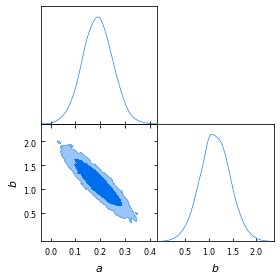

In [83]:
from getdist import plots, MCSamples
paramsdict_label = np.array([])
labels = ["a", "b"]
names = ['$a$', '$b$']

samples = MCSamples(samples=mcmc_chain, names = names, labels = labels)
g = plots.get_subplot_plotter()
g.triangle_plot([samples], filled=True)
